In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"alifyabella","key":"71c139ee866dbea48cd2e57650a172ac"}'}

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder,exist_ok=True)

with ZipFile(file_name,'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [20]:
data_0 = os.listdir('dataset/0')
data_1 = os.listdir('dataset/1')
data_2 = os.listdir('dataset/2')
data_3 = os.listdir('dataset/3')
data_4 = os.listdir('dataset/4')
data_5 = os.listdir('dataset/5')
data_6 = os.listdir('dataset/6')
data_7 = os.listdir('dataset/7')
data_8 = os.listdir('dataset/8')
data_9 = os.listdir('dataset/9')

In [21]:
len(data_0)

2236

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


In [23]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape data training:", X_train.shape)
print("Shape data testing:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape data training: (60000, 28, 28)
Shape data testing: (10000, 28, 28)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

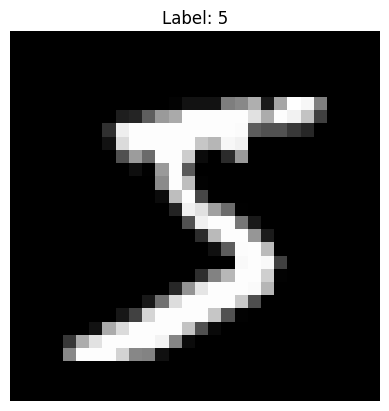

In [24]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')


In [25]:
# Normalisasi nilai piksel
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten data (28x28 -> 784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Shape setelah preprocessing:", X_train.shape)

Shape setelah preprocessing: (60000, 784)


In [26]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9732 - val_loss: 0.1000
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9753 - val_loss: 0.1000
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9778 - val_loss: 0.0943
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9725 - val_loss: 0.1152
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9976 - loss: 0.0093 - val_accuracy: 0.9766 - val_loss: 0.1080
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9743 - val_loss: 0.1090
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9977 - loss: 0.0079 - val_accuracy: 0.9747 - val_loss: 0.1164
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy:

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0953
Test Accuracy: 0.9771000146865845
Test Loss: 0.08182581514120102


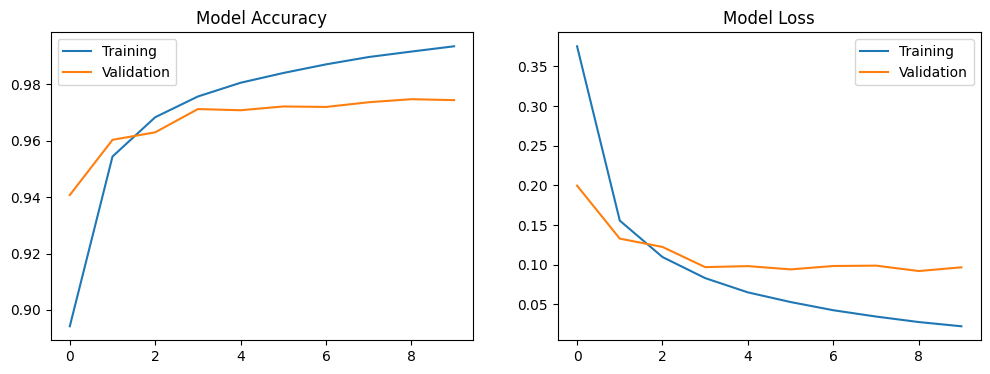

In [30]:
plt.figure(figsize=(12,4))

# Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


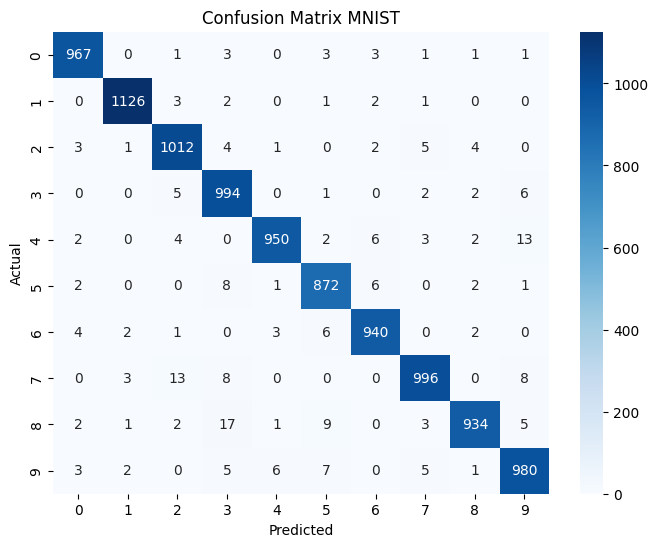

In [31]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MNIST')
plt.show()
